In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from src.score import *

In [3]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [5]:
DATADIR = '/data/weather-benchmark/5.625deg/geopotential_500/'
PREDDIR = '/data/weather-benchmark/predictions/'

In [27]:
z500_validation = load_test_data(DATADIR)

/home/rasp/repositories/weather-benchmark/notebooks/src/score.py:24: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  ds = xr.open_mfdataset(f'{path}/*.nc')[var]
/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [37]:
tigge = xr.open_mfdataset('/data/weather-benchmark/tigge/5.625deg/*').gh.squeeze() * 9.807

/home/rasp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [40]:
tigge.load();

In [41]:
tigge

<xarray.DataArray 'gh' (time: 15330, lat: 32, lon: 64)>
array([[[50927.77 , 50950.164, 50972.363, ..., 50874.1  , 50889.215,
         50906.95 ],
        [50623.676, 50722.504, 50823.86 , ..., 50420.47 , 50487.35 ,
         50550.32 ],
        [50645.36 , 50872.19 , 51065.07 , ..., 50144.363, 50268.527,
         50422.008],
        ...,
        [50758.984, 50520.785, 50270.074, ..., 51331.62 , 51154.598,
         50967.785],
        [50907.543, 50891.516, 50863.344, ..., 50773.15 , 50803.57 ,
         50859.28 ],
        [51196.35 , 51209.695, 51222.652, ..., 51141.992, 51160.84 ,
         51180.83 ]],

       [[50900.203, 50923.63 , 50947.57 , ..., 50843.266, 50858.6  ,
         50878.117],
        [50699.887, 50809.85 , 50906.395, ..., 50416.715, 50455.13 ,
         50582.617],
        [50720.   , 50939.47 , 51113.387, ..., 50118.72 , 50257.67 ,
         50461.215],
        ...,
        [50759.918, 50531.695, 50278.344, ..., 51326.516, 51147.656,
         50948.777],
        [50876.4

In [14]:
15330 /21

730.0

In [60]:
init_times = tigge.time[::21]

In [61]:
init_times

<xarray.DataArray 'time' (time: 730)>
array(['2017-01-01T00:00:00.000000000', '2017-01-01T12:00:00.000000000',
       '2017-01-02T00:00:00.000000000', ..., '2017-12-30T12:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2017-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    lev      float64 5e+04
  * time     (time) datetime64[ns] 2017-01-01 ... 2017-12-31T12:00:00
Attributes:
    standard_name:  time
    axis:           T

In [62]:
lead_times = xr.DataArray(
    np.arange(0, 126, 6), dims=['lead_time'], coords={'lead_time': np.arange(0, 126, 6)})

In [63]:
lead_times

<xarray.DataArray (lead_time: 21)>
array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120])
Coordinates:
  * lead_time  (lead_time) int64 0 6 12 18 24 30 36 ... 84 90 96 102 108 114 120

In [64]:
(len(lead_times)), len(init_times)

(21, 730)

In [65]:
tigge_by_lead = xr.DataArray(
    tigge.values.reshape((len(init_times), len(lead_times), 32, 64)),
    dims = ['time', 'lead_time', 'lat', 'lon'],
    coords = {'time': init_times, 'lead_time': lead_times, 'lat': tigge.lat, 'lon': tigge.lon}
)

In [69]:
tigge_by_lead.to_netcdf(f'{PREDDIR}/tigge_5.625deg.nc')

In [67]:
rmses_tigge = evaluate_iterative_forecast(tigge_by_lead, z500_validation)

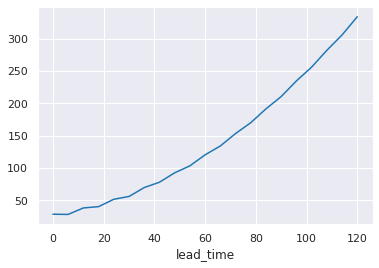

In [68]:
rmses_tigge.plot()